In [1]:
import TimeEvolution as te
import numpy as np
from scipy.linalg import eig
import HubbardModel_func as hf
from multiprocessing import cpu_count, Manager, Pool

# Set Up the Model
***

In [2]:
# model
nSites = 3
category = "single"

# set up the model
basis, psi = te.setup_model(nSites,category)

# parameters
U = [u for u in np.linspace(0.1, 1000, num= 10* 1000)]     # double occ (potential energy) range
t = 1                                                      # tunneling (kinetic energy)
dtau = 0.1                                                 # time step

# constraints
min_prob = 0.99                                            # minimum probability of category
min_heis = 0.5                                             # minimum heisenberg state probability


timeOperators = te.get_timeOperators(U,t,dtau,basis)       # time operators


Heis = te.get_heisenberg(basis)                            # Heisenberg matrix
Heis = eig(Heis, left= True)[1][:,:3]                      # Heisenberg eigenvectors


psi_0 = psi[0]                                             # initial state (antiferromagnetic)
#psi_0 = [ [h] for h in Heis[:,0] ]                        # start system in Heisenberg state

# Solutions
***
## Minimize U
The algorithm prefers the lowest U values while keeping the singly occupied state probability above the constraint

Estimated time: 27.138 minutes
25% done in 6.972 minutes
50% done in 14.035 minutes
75% done in 21.131 minutes
Actual time: 28.19 minutes


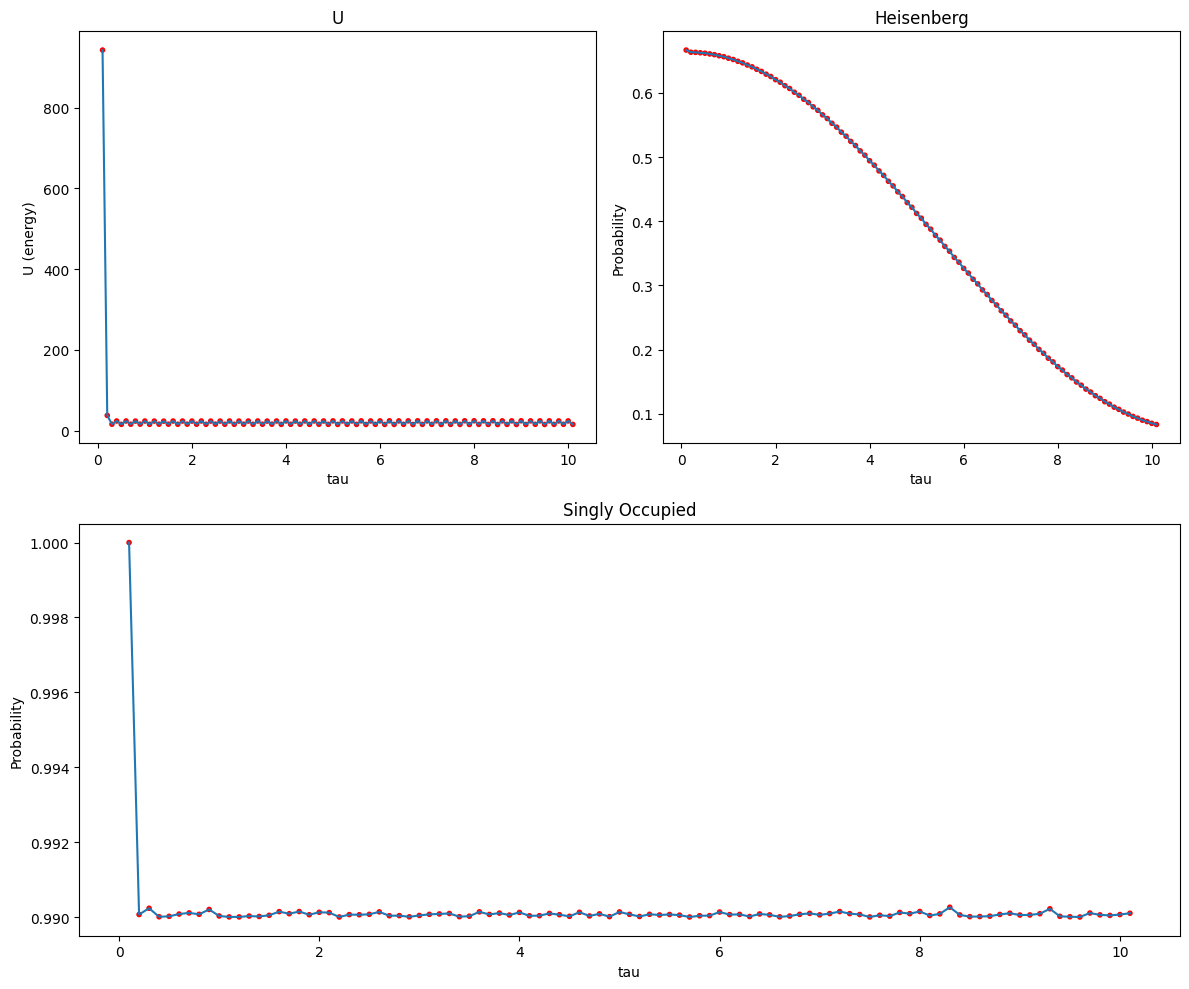

In [3]:
solution0 = te.find_solution(U, dtau, psi_0, timeOperators, Heis, min_heis=0)
te.plot_solution(solution0)

Lets increase the constraint to 99.9% singly occupied probability (default is 99.0%)

Estimated time: 28.006 minutes
25% done in 7.065 minutes
50% done in 14.127 minutes
75% done in 21.191 minutes
Actual time: 28.275 minutes


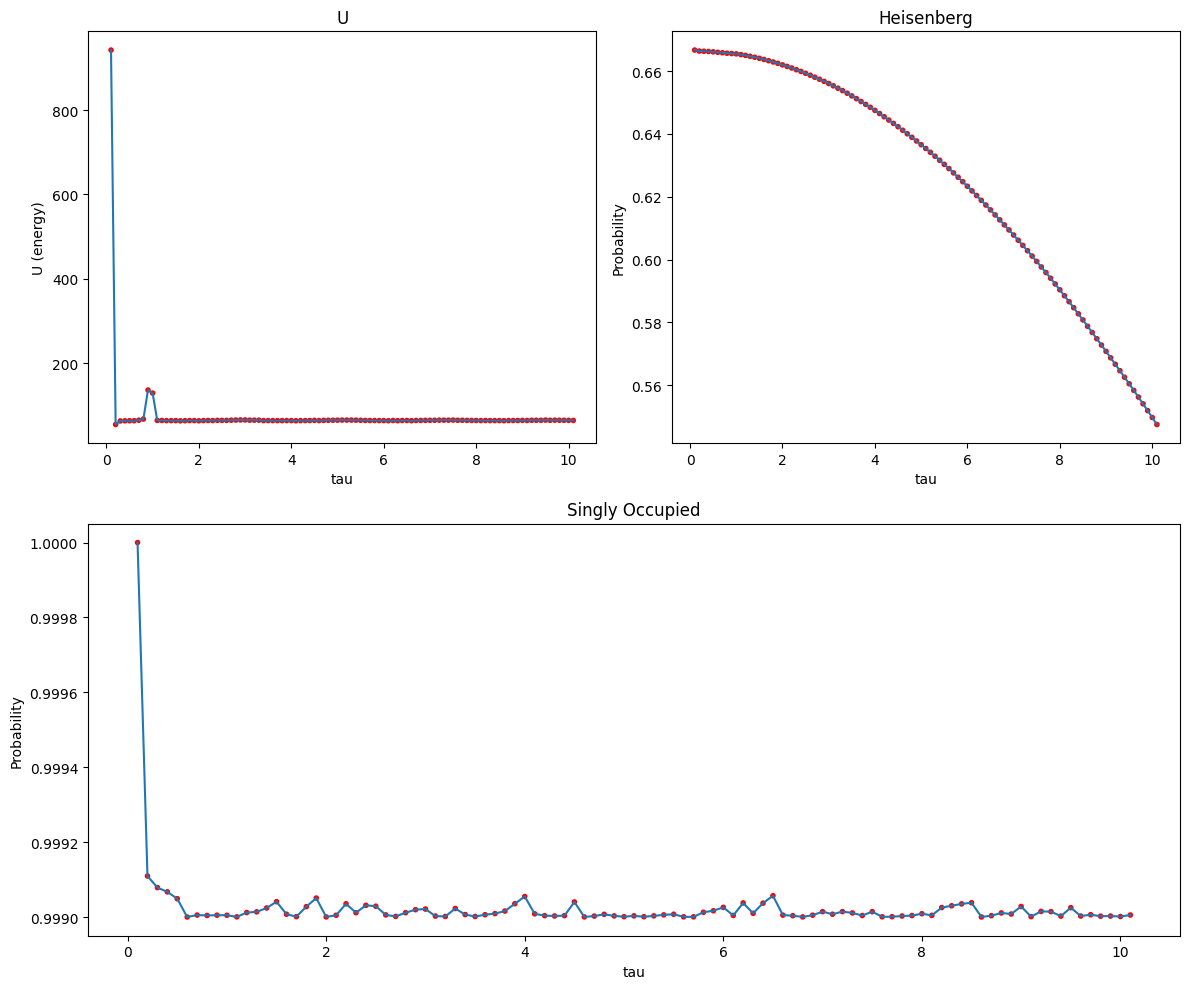

In [4]:
solution1 = te.find_solution(U, dtau, psi_0, timeOperators, Heis, min_prob=0.999, min_heis=0)
te.plot_solution(solution1)

## Maximize Singly Occupied States
The algorithm prefers the states with maximum singly occupied probability

Estimated time: 25.431 minutes
25% done in 6.376 minutes
50% done in 12.75 minutes
75% done in 19.133 minutes
Actual time: 25.523 minutes


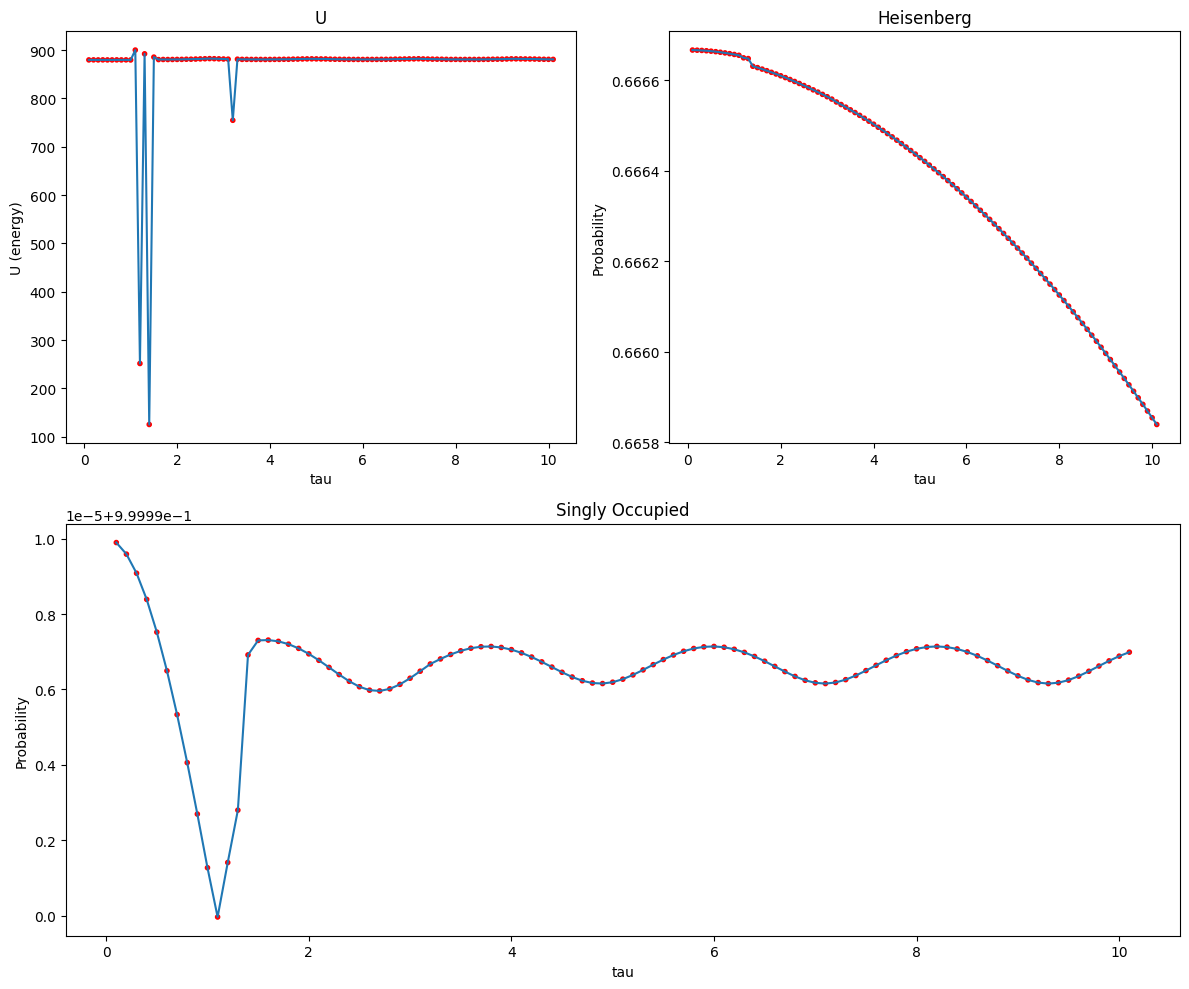

In [5]:
# Prefer singly occupied state
U = [u for u in np.linspace(0.1, 900, num= 10* 900)]       # double occ (potential energy) range
timeOperators = te.get_timeOperators(U,t,dtau,basis)             # time operators

solution2 = te.find_solution(U, dtau, psi_0, timeOperators, Heis, grow= 'single', trim= 'single')
te.plot_solution(solution2)

## Different variations of the algorithm
### Grow by lowest U, trim to highest singly occupied probability
The algorithm grows by choosing the lowest U values (that meet our contstraints), but is trimmed to prefer the states with the highest probability of being singly occupied

Estimated time: 25.651 minutes
25% done in 6.395 minutes
50% done in 12.791 minutes
75% done in 19.174 minutes
Actual time: 25.567 minutes


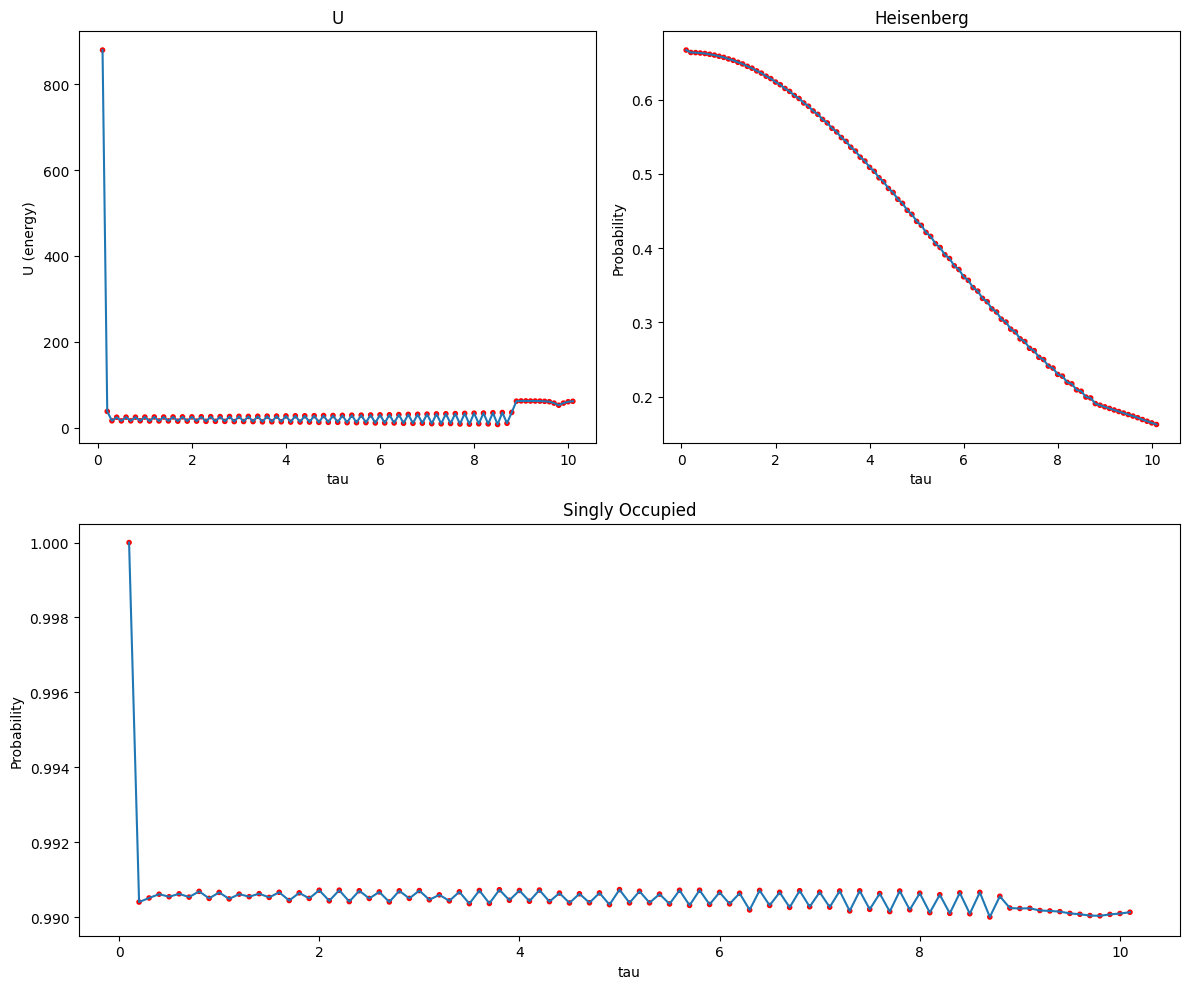

In [6]:
solution3 = te.find_solution(U, dtau, psi_0, timeOperators, Heis, grow= 'U', trim= 'single', min_heis=0)
te.plot_solution(solution3)

### Grow by highest singly occupied probability, trim to lowest average U
The algorithm grows by choosing the lowest U values (that meet our contstraints), but is trimmed to prefer the states with the highest probability of being singly occupied

Estimated time: 25.483 minutes
25% done in 6.346 minutes
50% done in 12.717 minutes
75% done in 19.092 minutes
Actual time: 25.511 minutes


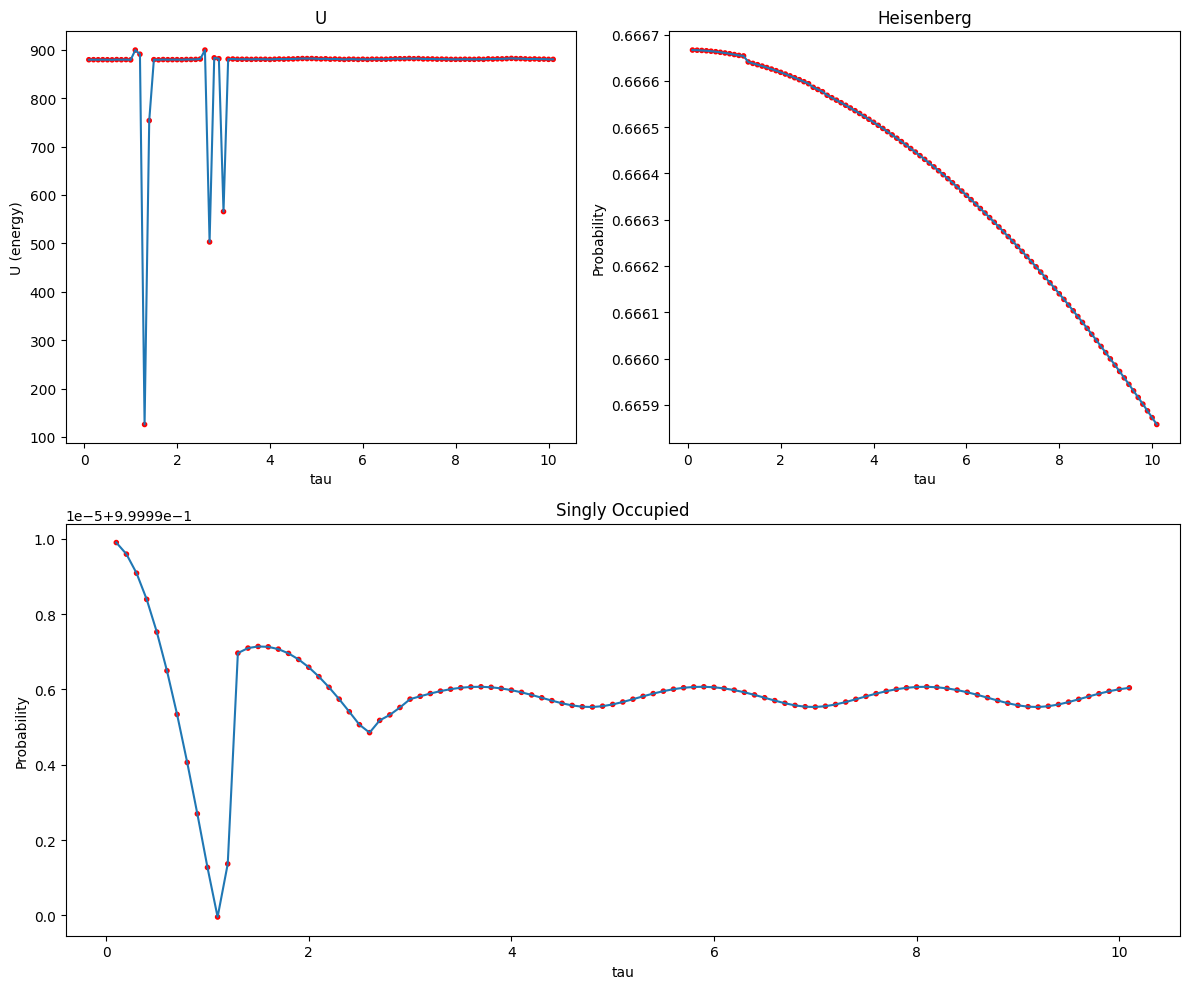

In [7]:
solution4 = te.find_solution(U, dtau, psi_0, timeOperators, Heis, grow= 'single', trim= 'U')
te.plot_solution(solution4)

## Heisenberg State
Maximize the Heisenber state

Estimated time: 25.628 minutes
25% done in 6.389 minutes
50% done in 12.791 minutes
75% done in 19.149 minutes
Actual time: 25.549 minutes


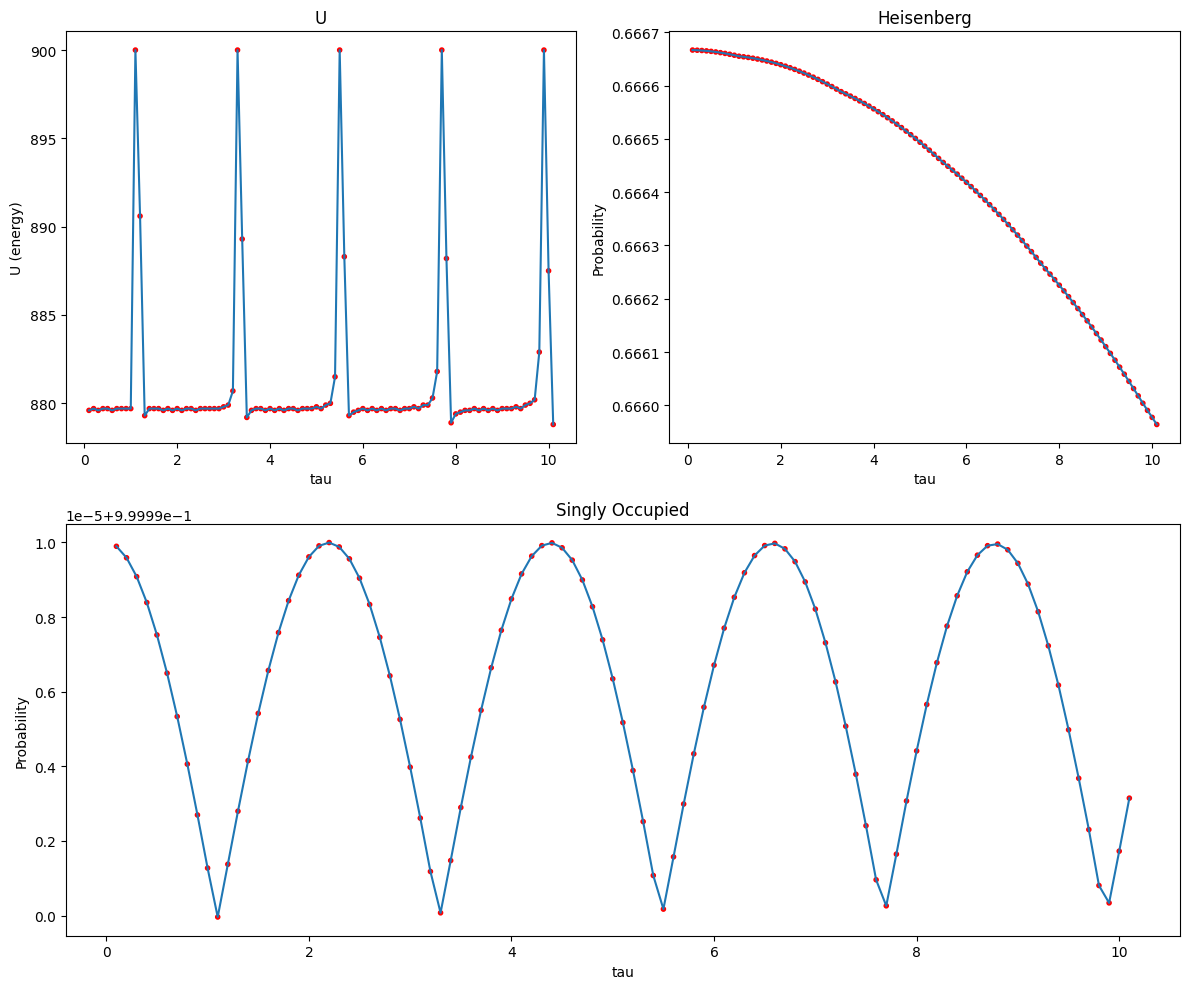

In [8]:
solution5 = te.find_solution(U, dtau, psi_0, timeOperators, Heis, grow='heis', trim='heis', min_prob=0)
te.plot_solution(solution5)

Now, start the system in the Heisenberg state...

Estimated time: 24.086 minutes
25% done in 6.217 minutes
50% done in 12.57 minutes
75% done in 18.942 minutes
Actual time: 25.287 minutes


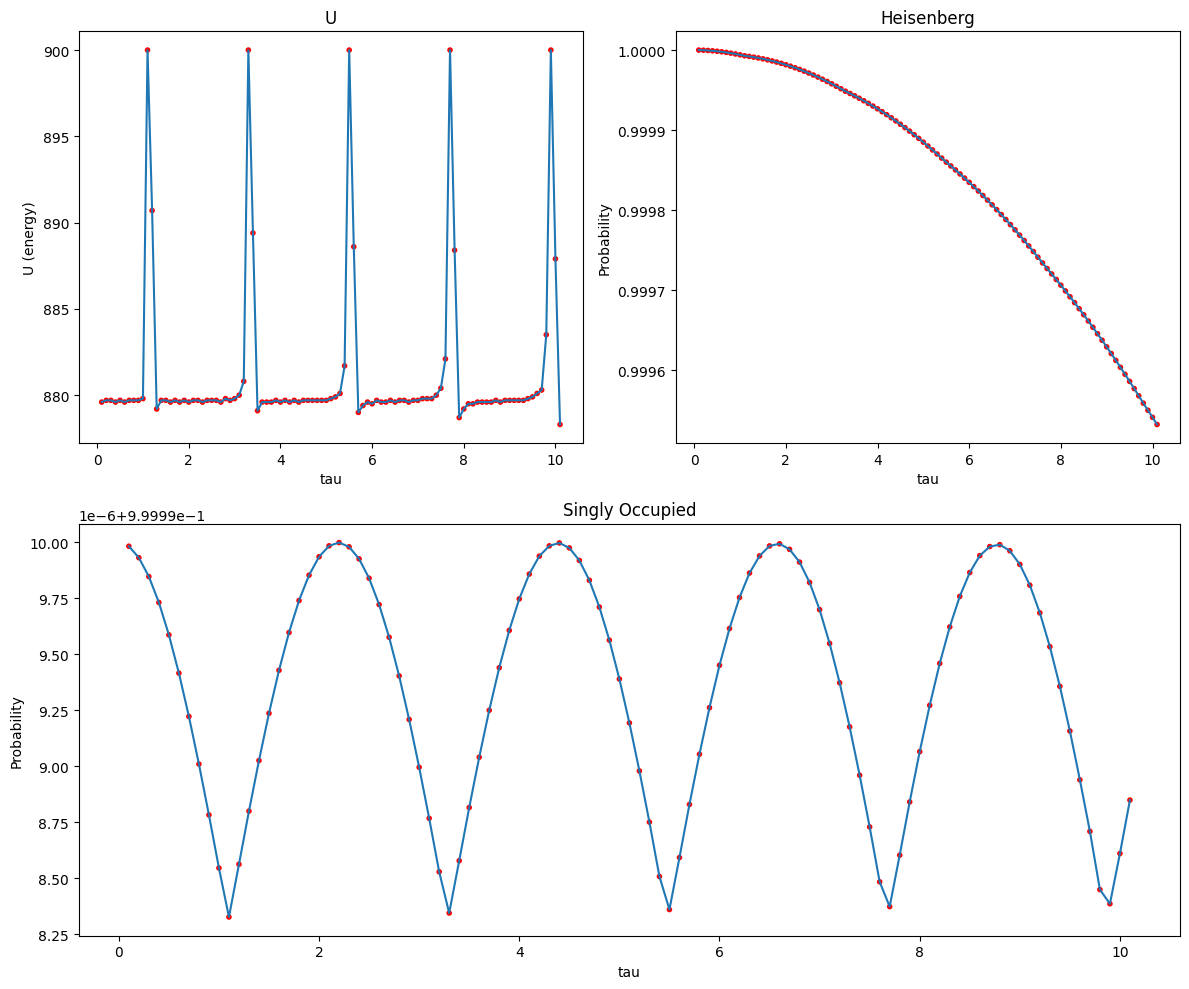

In [10]:
psi_H = [ [h] for h in Heis[:,0] ] 
solution6 = te.find_solution(U, dtau, psi_H, timeOperators, Heis, grow='heis', trim='heis', min_prob=0)
te.plot_solution(solution6)

# Conclusion
I was able to keep the system in the singly occupied states with over 99.99% probability. My algorithm was also able to minimize U while keeping the system above a threshold singly occupied probability.  Starting the system in the Heisenberg state, I was able to find a solution that kept the system in the Heisenberg state with a 99.9% probability. More insight is needed to understand the patterns in these solutions.